In [2]:
import warnings
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

# Suppress valuewarning when fitting ARIMA model.
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)


# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Support Vector Classifier

## Read input synthetic data

In [3]:
df = pd.read_excel('C:/Users/jadja/Desktop/data/supervised-learning.xlsx', sheet_name='SYNDATA')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      50 non-null     float64
 1   X2      50 non-null     float64
 2   y       50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


## Fit Linear SVC to the train data

In [4]:
X = df.drop('y', axis=1)
X['X2'] = X['X2']*20
y = df[['y']]

In [5]:
from sklearn.svm import LinearSVC

svc_linear = LinearSVC();
svc_linear.fit(X, y);

Evaluate performance on the train data

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = svc_linear.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[18  7]
 [ 6 19]]
              precision    recall  f1-score   support

          -1       0.75      0.72      0.73        25
           1       0.73      0.76      0.75        25

    accuracy                           0.74        50
   macro avg       0.74      0.74      0.74        50
weighted avg       0.74      0.74      0.74        50



Look at the fitted coefficients

In [7]:
svc_linear.intercept_
svc_linear.coef_

array([-0.41556664])

array([[0.47716399, 0.02038681]])

# <font color='darkorange'>Activity: Linear SVM on Financial data</font>

In [8]:
#Status	X1	X2	X3
df = pd.read_excel('C:/Users/jadja/Desktop/data/supervised-learning.xlsx', sheet_name='Financial')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Status  66 non-null     object 
 1   X1      66 non-null     float64
 2   X2      66 non-null     float64
 3   X3      66 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.2+ KB


In [9]:
X = df[['X1', 'X2', 'X3']].copy()
X['X2'] = X['X2'] * 20

In [10]:
le = LabelEncoder()
y = le.fit_transform(df['Status'])

In [11]:
svc_linear = LinearSVC()
svc_linear.fit(X, y)

LinearSVC()

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = svc_linear.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[33  0]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.97      0.98        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



In [13]:
svc_linear.intercept_
svc_linear.coef_


array([0.00130168])

array([[-0.0454435 , -0.00275033, -0.00114004]])

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='X1', ylabel='X2'>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

Text(0.5, 1.0, 'Linear SVC Decision Boundary')

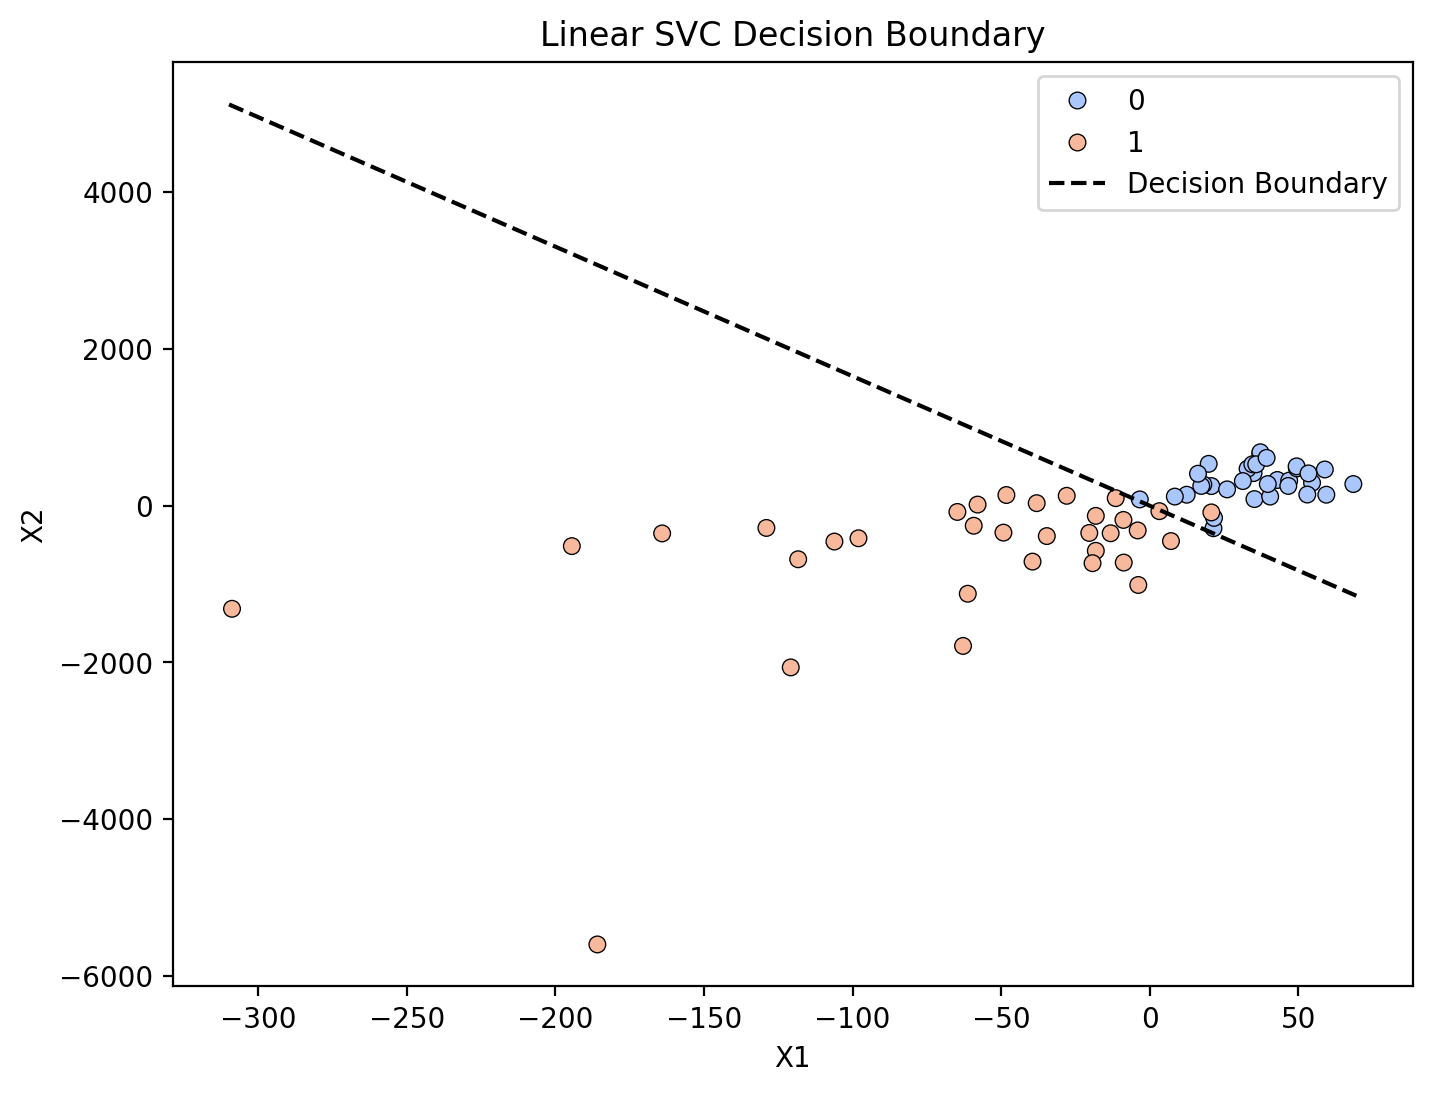

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


w = svc_linear.coef_[0]  
b = svc_linear.intercept_[0] 
x_min, x_max = X["X1"].min() - 1, X["X1"].max() + 1
y_min, y_max = X["X2"].min() - 1, X["X2"].max() + 1


xx = np.linspace(x_min, x_max, 100)
yy = (-w[0] * xx - b) / w[1]  

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["X1"], y=X["X2"], hue=y, palette="coolwarm", edgecolor="k")

plt.plot(xx, yy, "k--", label="Decision Boundary")

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Linear SVC Decision Boundary")
plt.show()
